# Stoich45 Feature Engineering - Final datasets

Dataset 1: 8 PCA generated features

Dataset 2: 23 features that different feature selection methods agreed on

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from matplotlib_venn import venn3, venn2

In [26]:
seed=1234

## Load datasets

In [27]:
df_stoich45 = pd.read_csv('relaxed_structures_fingerprints/stoich45_fingerprints.csv', sep=',')
df_stoich45

,MOF,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,density_mean,density_geometric_mean,density_standard_deviation,density_max,density_min,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min
0,qmof-0000295,4.840000,2.833720,5.689851,29.0,1.0,7.960000,3.991657,6.749696,16.0,...,991.514712,4.182460,1912.665927,8960.0,0.0899,1233.652000,1223.402105,146.933016,1402.3,745.5
1,qmof-00019ff,6.160494,3.696834,7.475816,35.0,1.0,9.790123,5.722078,6.461120,17.0,...,1268.620262,23.314272,1455.767729,8900.0,0.0899,1205.481481,1198.057939,131.447336,1402.3,760.4
2,qmof-0001b0d,4.982301,3.323008,4.774531,30.0,1.0,9.318584,5.295894,6.452365,16.0,...,1285.340051,21.643255,1546.598997,8900.0,0.0899,1193.978761,1186.951791,126.964974,1402.3,760.4
3,qmof-0003ae4,5.125000,3.915946,2.847696,8.0,1.0,9.875000,5.471130,6.918047,16.0,...,632.433350,9.465604,955.356975,2260.0,0.0899,1157.362500,1115.508932,259.170918,1313.9,520.2
4,qmof-000512e,7.400000,6.724170,3.088689,19.0,1.0,13.700000,11.500180,4.313931,16.0,...,721.626295,15.205775,1023.803409,2260.0,0.0899,1218.510000,1187.405501,219.174061,1402.3,418.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-fff0df1,4.852941,3.061308,5.047611,29.0,1.0,8.676471,4.605269,6.676211,16.0,...,1094.694428,8.472108,1743.749437,8960.0,0.0899,1216.669118,1207.703553,139.305687,1402.3,745.5
20370,qmof-fff4e91,5.652174,3.627508,5.857798,30.0,1.0,9.739130,5.683942,6.441829,16.0,...,1293.323270,19.449685,1662.683156,7140.0,0.0899,1196.652174,1189.732816,126.320937,1313.9,906.4
20371,qmof-fffa2d9,9.214286,5.231450,10.631346,56.0,1.0,11.000000,6.622890,6.881653,17.0,...,610.714507,4.941293,1077.738281,3510.0,0.0899,1222.228571,1205.732522,164.349362,1313.9,502.9
20372,qmof-fffd0e2,6.423077,3.917995,7.150433,35.0,1.0,10.000000,6.002496,6.330634,17.0,...,1291.114698,21.226806,1625.387651,7140.0,0.0899,1209.240385,1201.115960,138.735819,1402.3,906.4


In [28]:
df_hse06 = pd.read_csv('train_hse06.csv', sep=',')
df_hse06

,inputs.hse06.theory,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume,qmof_id
0,HSE06,4.988289,['[Zn]'],"['[O-]C(=O)C', 'n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...",[O-]C(=O)C.[Zn].n1ccc(cc1)C1C(c2ccncc2)C(C1c1c...,78,1.37489,2.13029,1.693758,822.916880,qmof-755b963
1,HSE06,3.196302,['[Zn]'],['c1ncn(c1)Cc1ccc(cc1)Cn1cncc1'],[Zn].c1ncn(c1)Cc1ccc(cc1)Cn1cncc1,134,1.20752,2.66721,1.453964,1409.227968,qmof-431c61c
2,HSE06,3.617418,['[OH2][Pr][OH2]'],['[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C...,[O-]C(=O)c1cc(c(cc1C(=O)c1ccccc1)C(=O)[O-])C(=...,134,1.20601,2.81754,1.683856,1450.490082,qmof-0954b37
3,HSE06,3.220291,['Cl[Cu]Cl'],['Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F'],Cl[Cu]Cl.Fc1c(F)c(Sc2ccccn2)c(c(c1Sc1ccccn1)F)F,35,3.04146,3.91264,1.469086,568.352244,qmof-6994eb7
4,HSE06,2.436139,['[Ag]'],['n1ccc(cc1)c1ccncc1'],[Ag].n1ccc(cc1)c1ccncc1,104,1.22817,2.05442,1.729977,935.476068,qmof-1eea8fc
...,...,...,...,...,...,...,...,...,...,...,...
8643,HSE06,3.605205,"['[Fe]', '[Ni]']",['[C]#N'],[C]#N.[Fe].[Ni],36,0.75723,1.76057,1.851188,364.937932,qmof-46a3716
8644,HSE06,3.776886,['[Cu]'],['[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O'],[Cu].[O]P(=O)(c1cccc(c1)P(=O)(O)[O])O,86,0.84395,2.34244,1.839557,866.228574,qmof-b2fb769
8645,HSE06,3.880014,['[Mn]'],['[N][N][N]'],[Mn].[N][N][N],70,0.83223,1.52142,1.814356,752.692981,qmof-4a920a2
8646,HSE06,4.301264,['[OH2][Ca][OH2]'],['CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-]'],CCc1[nH]c(c(n1)C(=O)O)C(=O)[O-].[OH2][Ca][OH2],94,1.34620,2.28803,1.639434,896.172985,qmof-0f4d4bb


## Merge HSE06 & Stoich45

In [29]:
# Merge the DataFrames on the matching columns
df_hse06_stoich45 = pd.merge(df_hse06, df_stoich45, left_on='qmof_id', right_on='MOF', how='right')

# Drop the 'MOF' column if it's no longer needed
df_hse06_stoich45.drop(columns=['qmof_id'], inplace=True)

# Drop the 'MOF' and 'inputs.*.theory' columns
# And columns that have the format 'info.*' in the column name
df_hse06_stoich45.drop(columns=['MOF', 'inputs.hse06.theory'], inplace=True)
df_hse06_stoich45.drop(columns=df_hse06_stoich45.filter(regex='info.*').columns, inplace=True)

# print column names and number of columns
print(df_hse06_stoich45.columns)
print('number of columns:', len(df_hse06_stoich45.columns))

# Print NaN values in the DataFrame
print(df_hse06_stoich45.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_stoich45_for_pca = df_hse06_stoich45.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_hse06_stoich45.shape[0] - df_hse06_stoich45_for_pca.shape[0])

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_stoich45_for_pca.shape)

df_hse06_stoich45_for_pca

Index(['outputs.hse06.bandgap', 'atomic_num_mean', 'atomic_num_geometric_mean',
       'atomic_num_standard_deviation', 'atomic_num_max', 'atomic_num_min',
       'group_num_mean', 'group_num_geometric_mean',
       'group_num_standard_deviation', 'group_num_max', 'group_num_min',
       'period_num_mean', 'period_num_geometric_mean',
       'period_num_standard_deviation', 'period_num_max', 'period_num_min',
       'electronegativity_mean', 'electronegativity_geometric_mean',
       'electronegativity_standard_deviation', 'electronegativity_max',
       'electronegativity_min', 'electron_affinity_mean',
       'electron_affinity_geometric_mean',
       'electron_affinity_standard_deviation', 'electron_affinity_max',
       'electron_affinity_min', 'melting_mean', 'melting_geometric_mean',
       'melting_standard_deviation', 'melting_max', 'melting_min',
       'boiling_mean', 'boiling_geometric_mean', 'boiling_standard_deviation',
       'boiling_max', 'boiling_min', 'density_mean', 

,outputs.hse06.bandgap,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,density_mean,density_geometric_mean,density_standard_deviation,density_max,density_min,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min
0,3.751390,4.840000,2.833720,5.689851,29.0,1.0,7.960000,3.991657,6.749696,16.0,...,991.514712,4.182460,1912.665927,8960.0,0.0899,1233.652000,1223.402105,146.933016,1402.3,745.5
4,3.014584,7.400000,6.724170,3.088689,19.0,1.0,13.700000,11.500180,4.313931,16.0,...,721.626295,15.205775,1023.803409,2260.0,0.0899,1218.510000,1187.405501,219.174061,1402.3,418.8
5,3.284171,6.454545,4.107111,6.272068,30.0,1.0,10.363636,6.247033,6.463502,16.0,...,1030.459014,8.874182,1680.181346,7140.0,0.0899,1230.522727,1221.752785,142.324105,1402.3,906.4
6,5.170849,5.562500,3.113594,8.169828,48.0,1.0,8.687500,4.521585,6.834826,16.0,...,976.914425,5.589511,1726.258029,8650.0,0.0899,1228.065625,1221.424040,122.525772,1313.9,867.8
12,3.978235,4.853659,3.229498,4.436880,27.0,1.0,9.097561,5.043818,6.558572,16.0,...,1099.320937,10.509249,1648.227778,8900.0,0.0899,1219.541463,1210.807020,139.686543,1402.3,760.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364,3.030492,7.705882,5.061396,6.968540,29.0,1.0,11.352941,7.713655,5.880588,17.0,...,1325.399506,17.891800,2183.677437,8960.0,0.0899,1213.182353,1199.398347,171.503666,1402.3,745.5
20366,4.483906,8.814815,5.003135,11.575955,48.0,1.0,11.185185,7.321641,6.116384,16.0,...,1216.128085,8.712412,2311.005049,8650.0,0.0899,1234.559259,1223.359359,158.253641,1402.3,867.8
20368,3.510606,6.903226,4.435160,8.317703,48.0,1.0,10.903226,7.206663,5.882477,16.0,...,1426.394361,40.085683,1712.755584,8650.0,0.0899,1193.154839,1183.393508,151.921017,1402.3,867.8
20370,4.055379,5.652174,3.627508,5.857798,30.0,1.0,9.739130,5.683942,6.441829,16.0,...,1293.323270,19.449685,1662.683156,7140.0,0.0899,1196.652174,1189.732816,126.320937,1313.9,906.4


## 1. PCA Dataset

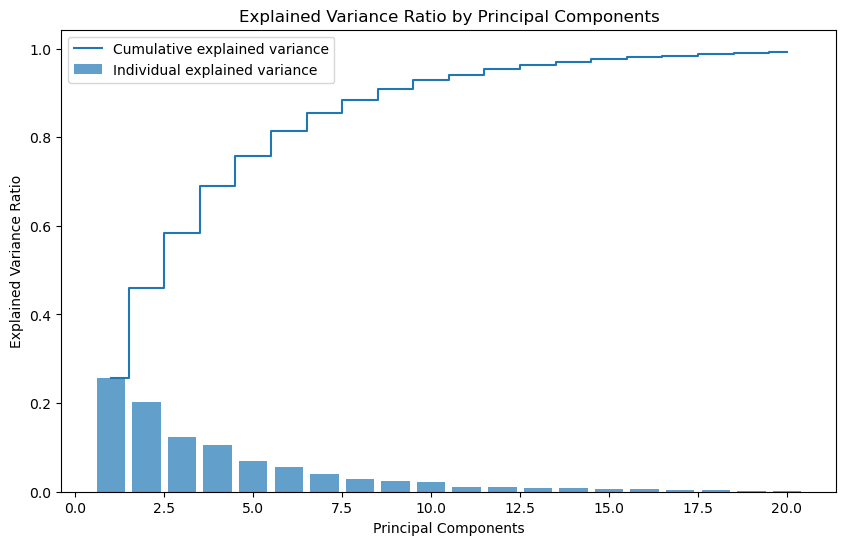

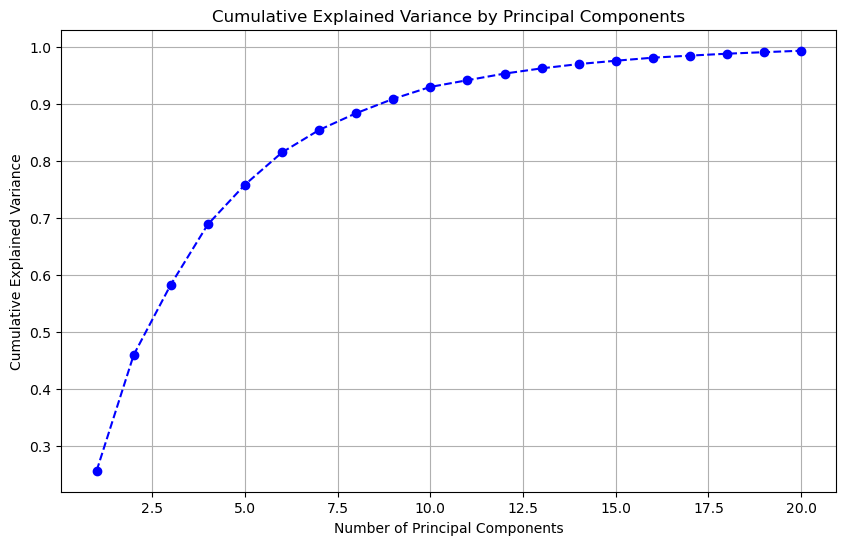

In [30]:
# Standardize the features. Exclude the target variable
X = df_hse06_stoich45_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich45_for_pca['outputs.hse06.bandgap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with more components
n = 20
pca = PCA(n_components=n)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n)])

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n+1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()

In [31]:
# Keeping 8 components

n_components = 8  # Choose based on the plot
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)  # X is your original feature matrix
X_pca_final.shape

(8354, 8)

In [32]:
# Create a DataFrame with the PCA results

X_pca_final_df = pd.DataFrame(X_pca_final)
X_pca_final_df['outputs.hse06.bandgap'] = y.values
X_pca_final_df

,0,1,2,3,4,5,6,7,outputs.hse06.bandgap
0,-4.307243,-0.675081,-1.699228,0.251383,0.037525,-0.232749,1.626014,-0.089816,3.751390
1,2.968017,5.844938,7.762438,-3.366063,1.862059,-0.491295,-1.075145,0.422407,3.014584
2,-1.512710,1.450255,-0.367809,-2.149871,0.786003,0.144044,-0.260083,-0.407051,3.284171
3,-3.060303,-0.366641,-1.862870,-0.043417,-0.726980,-1.471308,-0.445412,-0.351611,5.170849
4,-2.280525,-2.179344,0.191111,-0.418365,-0.204422,-0.338509,1.133011,-0.218938,3.978235
...,...,...,...,...,...,...,...,...,...
8349,3.552997,0.582928,0.199021,-1.736608,1.168031,2.582361,0.083567,-1.136056,3.030492
8350,1.288160,4.360262,-1.739419,-2.324693,0.880300,-0.636726,-0.356986,0.001278,4.483906
8351,3.574325,-2.538826,0.273596,-1.195941,1.655407,-0.468605,-1.515464,0.410610,3.510606
8352,-0.393199,-2.688377,0.899968,-0.433518,0.599757,-0.971313,-0.401470,-0.578850,4.055379


In [33]:
# Save to CSV
X_pca_final_df.to_csv("Stoich45_PCA_dataset.csv", index=False)
print('PCA dataset saved to CSV')

PCA dataset saved to CSV


## 2. Feature engineering methods (other than PCA)

In [34]:
# Load dataset
X = df_hse06_stoich45_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich45_for_pca['outputs.hse06.bandgap']

#### 1. Recursive Feature Elimination

- Recursively removes the least important features and keeps the best ones.

Procedure:
1. Trains a Random Forest Regressor on X, y.
2. Ranks features by importance.
3. Removes the least important feature, retrains, and repeats.
4. Stops when only given number of features remain. (40 in case below)

Usage advisory:
- Best for smaller datasets (since it retrains models multiple times).
- Works well when you want a compact, optimal feature subset.

In [35]:
rf = RandomForestRegressor(random_state=seed)  # Fix seed for reproducibility
rfe = RFE(estimator=rf, n_features_to_select=40).fit(X, y)  # Use RandomForestRegressor
rfe_selected = np.where(rfe.support_)[0]

#### 2. Random Forest Feature Importance

- Uses a Random Forest model to estimate feature importance based on how much each feature improves predictions.

Procedure:
- Trains a Random Forest Regressor on X, y.
- Measures how much each feature contributes to reducing prediction errors.
- Selects the top 30 most important features.

Usage advisory:
- Works well for datasets with many features.
- Can detect non-linear relationships between features and the target.


Features remaining after Random Forest feature importance selection: 30 out of 45


/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


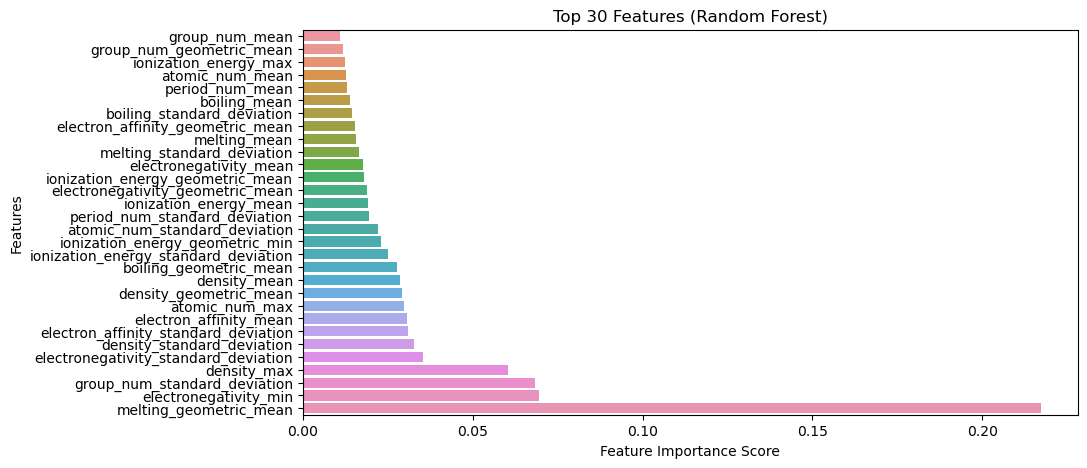

In [36]:
rf = RandomForestRegressor(n_estimators=100, random_state=seed).fit(X, y)  # Use RandomForestRegressor
rf_importance = np.argsort(rf.feature_importances_)[-30:]  # Select top 30 features

print('Features remaining after Random Forest feature importance selection:', len(rf_importance), 'out of', X.shape[1])

# Feature Importance Plot (Random Forest)
plt.figure(figsize=(10, 5))
sns.barplot(x=rf.feature_importances_[rf_importance], y=[X.columns[i] for i in rf_importance])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 30 Features (Random Forest)")
plt.show()

#### 3. Lasso (L1 Regularization) for Feature Selection

- Uses L1 regularization to shrink less important feature weights to zero.
- The remaining features are the most relevant.

Procedure:
- Trains a Lasso regression model on X, y.
- Features with zero coefficients are removed.
- Selects the top 30 features with the highest absolute coefficients.

Usage advisory:
- Best when dealing with high-dimensional datasets (many features).
- Helps with feature selection and preventing overfitting.

In [37]:
lasso = Lasso(alpha=0.01).fit(X, y)  # Lasso works for regression
lasso_selected = np.argsort(abs(lasso.coef_))[-30:]

print('Features remaining after Lasso selection:', len(lasso_selected), 'out of', X.shape[1])

Features remaining after Lasso selection: 30 out of 45


/Users/simran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.517e+03, tolerance: 9.576e-01
  model = cd_fast.enet_coordinate_descent(


Check overlap of features generated by each method

Original features: 45 features
Final selected features: 23 features


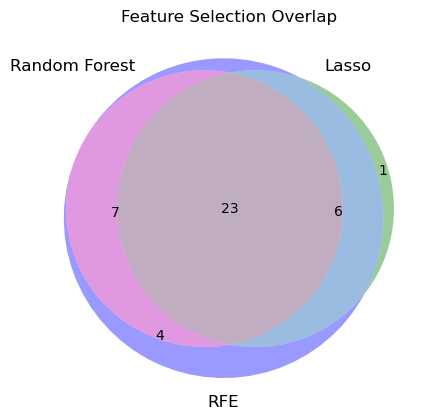

In [38]:
final_features = set(rf_importance) & set(lasso_selected) & set(rfe_selected)  # Intersection
#final_features = set(rf_importance) | set(lasso_selected) | set(rfe_selected)  # Union

X_final = X.iloc[:, list(final_features)]
print(f"Original features: {X.shape[1]} features")
print(f"Final selected features: {X_final.shape[1]} features")

# Venn Diagram of Feature Selection Methods
plt.figure(figsize=(5, 5))
venn3([set(rf_importance), set(lasso_selected), set(rfe_selected)], 
      ('Random Forest', 'Lasso', 'RFE'))
plt.title("Feature Selection Overlap")
plt.show()

Save the final set of features

In [39]:
X_final['outputs.hse06.bandgap'] = y.values
X_final

/var/folders/7j/lt22v0hs7lb07jhzsq_g_w8w0000gn/T/ipykernel_23755/4228885266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final['outputs.hse06.bandgap'] = y.values


,atomic_num_standard_deviation,atomic_num_max,group_num_mean,period_num_mean,electronegativity_min,electron_affinity_mean,electron_affinity_geometric_mean,electron_affinity_standard_deviation,melting_mean,melting_geometric_mean,...,density_mean,density_geometric_mean,density_standard_deviation,density_max,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min,outputs.hse06.bandgap
0,5.689851,29.0,7.960000,1.600000,1.90,100.252000,82.167123,45.559861,1143.143600,107.487344,...,991.514712,4.182460,1912.665927,8960.0,1233.652000,1223.402105,146.933016,1402.3,745.5,3.751390
4,3.088689,19.0,13.700000,2.050000,0.82,110.030000,72.816144,57.821122,1199.022000,206.066393,...,721.626295,15.205775,1023.803409,2260.0,1218.510000,1187.405501,219.174061,1402.3,418.8,3.014584
5,6.272068,30.0,10.363636,1.818182,1.65,100.818182,0.000000,58.491030,1114.843636,141.329527,...,1030.459014,8.874182,1680.181346,7140.0,1230.522727,1221.752785,142.324105,1402.3,906.4,3.284171
6,8.169828,48.0,8.687500,1.656250,1.69,110.787500,0.000000,42.372240,1231.431562,122.519183,...,976.914425,5.589511,1726.258029,8650.0,1228.065625,1221.424040,122.525772,1313.9,867.8,5.170849
12,4.436880,27.0,9.097561,1.658537,1.88,104.460976,82.484786,49.421674,1552.056341,186.153480,...,1099.320937,10.509249,1648.227778,8900.0,1219.541463,1210.807020,139.686543,1402.3,760.4,3.978235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364,6.968540,29.0,11.352941,2.000000,1.90,121.117647,67.620679,100.512201,1467.541765,253.964277,...,1325.399506,17.891800,2183.677437,8960.0,1213.182353,1199.398347,171.503666,1402.3,745.5,3.030492
20366,11.575955,48.0,11.185185,2.000000,1.69,93.111111,0.000000,62.259852,935.485926,130.152404,...,1216.128085,8.712412,2311.005049,8650.0,1234.559259,1223.359359,158.253641,1402.3,867.8,4.483906
20368,8.317703,48.0,10.903226,1.903226,1.69,102.548387,0.000000,64.328877,1786.626452,330.048989,...,1426.394361,40.085683,1712.755584,8650.0,1193.154839,1183.393508,151.921017,1402.3,867.8,3.510606
20370,5.857798,30.0,9.739130,1.739130,1.65,116.756522,0.000000,44.348843,1706.767826,241.158462,...,1293.323270,19.449685,1662.683156,7140.0,1196.652174,1189.732816,126.320937,1313.9,906.4,4.055379


In [40]:
# Save to CSV

X_final.to_csv("Stoich45_FeatureSelected_dataset.csv", index=False)
